In [1]:
sys.path.insert(0, './common')

import sys
import wave
import a2c_unite

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=311)

WAVE environment created.


In [4]:
hidden_layer = 512
model = a2c_unite.A2C(127, 2, hidden_layer, lr=3e-4)

In [9]:
save_path = './results/env01/a2c/512-unite-nstep-with-entropy222'
model.set_model_save_path(save_path)

In [10]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


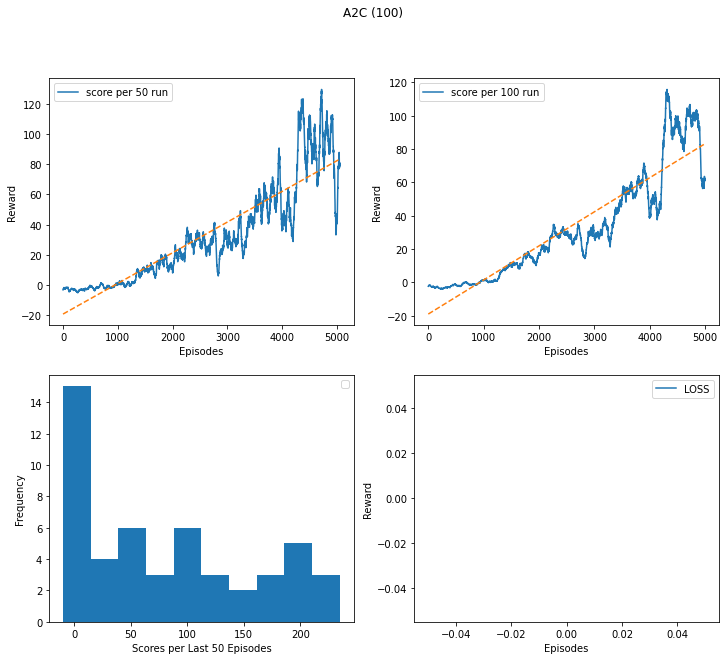

EPOCH: 99, total reward: -7.639999806880951, timestep: 53
EPOCH: 100, total reward: 53.09999160468578, timestep: 238
EPOCH: 101, total reward: -1.2600007206201553, timestep: 126
EPOCH: 102, total reward: 115.55998548865318, timestep: 589
EPOCH: 103, total reward: 5.679998263716698, timestep: 87
EPOCH: 104, total reward: 71.23998910188675, timestep: 376
EPOCH: 105, total reward: 15.579996928572655, timestep: 89
EPOCH: 106, total reward: -6.13000014424324, timestep: 23
EPOCH: 107, total reward: 15.609996944665909, timestep: 88
EPOCH: 108, total reward: -6.169999912381172, timestep: 24
EPOCH: 109, total reward: 209.99997001886368, timestep: 1000
EPOCH: 110, total reward: 23.539997950196266, timestep: 230
EPOCH: 111, total reward: 214.9999765008688, timestep: 1000
EPOCH: 112, total reward: 38.5399926006794, timestep: 230
EPOCH: 113, total reward: -7.450000047683716, timestep: 49


In [7]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True)

In [7]:
model.save_model()

Training history saved


In [3]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

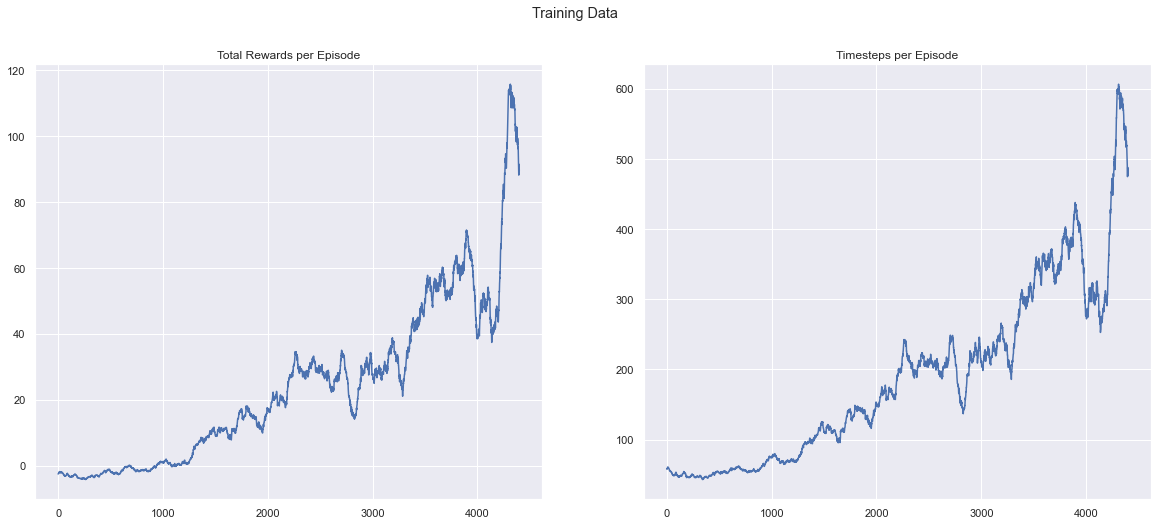

In [7]:
model.plot_train_memory(smooth=100)

In [21]:
env = wave.WaveEnv(env_path, 5, worker_id=2)
model.test(env)

WAVE environment created.


(291.5699602663517, 1469)

In [15]:
env = wave.WaveEnv(env_path, 20, worker_id=2)
model.test_avg(env, 100)

WAVE environment created.
8.769997477531433 125
-4.96000012755394 100
10.049998372793198 99
53.179993242025375 237
59.95999316871166 401
79.21999038755894 516
101.879983112216 563
114.86998443305492 703
3.1299988925457 138
56.239990055561066 276
-10.029999911785126 101
15.719997271895409 186
8.129997745156288 138
-6.289999887347221 26
82.50999462604523 350
43.72999370098114 326
21.91999663412571 262
99.28998625278473 515
-6.289999887347221 26
5.079997822642326 99
16.22999842464924 176
38.73999412357807 326
22.539994671940804 250
30.549995869398117 289
6.359998822212219 173
-9.489999696612358 90
35.75999340415001 185
33.05999451875687 239
104.28998653590679 515
-9.919999688863754 99
10.689998298883438 87
6.28999750316143 75
2.5499986112117767 49
5.029998779296875 100
-6.289999887347221 26
47.539991319179535 250
58.019990652799606 440
11.279997661709785 175
127.41998283565044 552
1.3399987518787384 174
34.27999500930309 315
52.50999589264393 450
86.07998517155647 579
-9.949999898672104 9

([8.769997477531433,
  -4.96000012755394,
  10.049998372793198,
  53.179993242025375,
  59.95999316871166,
  79.21999038755894,
  101.879983112216,
  114.86998443305492,
  3.1299988925457,
  56.239990055561066,
  -10.029999911785126,
  15.719997271895409,
  8.129997745156288,
  -6.289999887347221,
  82.50999462604523,
  43.72999370098114,
  21.91999663412571,
  99.28998625278473,
  -6.289999887347221,
  5.079997822642326,
  16.22999842464924,
  38.73999412357807,
  22.539994671940804,
  30.549995869398117,
  6.359998822212219,
  -9.489999696612358,
  35.75999340415001,
  33.05999451875687,
  104.28998653590679,
  -9.919999688863754,
  10.689998298883438,
  6.28999750316143,
  2.5499986112117767,
  5.029998779296875,
  -6.289999887347221,
  47.539991319179535,
  58.019990652799606,
  11.279997661709785,
  127.41998283565044,
  1.3399987518787384,
  34.27999500930309,
  52.50999589264393,
  86.07998517155647,
  -9.949999898672104,
  10.029997631907463,
  94.98998735845089,
  -10.02999991

In [ ]:
# A2C 10,000 EPOCH (121.22258364647627, 638.93)
# A2C 20,000 EPOCH (480.5063384319842, 2308.27)
# A2C 20,000 EPOCH 2 (387.9843504935503, 1894.74)

In [14]:
env.close()